In [1]:
#imports
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression

In [8]:
url = 'marketing_customer_analysis_clean.csv'
df = pd.read_csv(url)
df = df.drop(columns = ["unnamed:_0", "customer", "effective_to_date"])
df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [9]:
#retrieves the categorical and numerical data types
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')

In [10]:

ordinals = categoricals_df[["coverage","education","vehicle_size"]]
nominals = categoricals_df.drop(columns=["coverage","education","vehicle_size"])
nominals


,state,response,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_type
0,Arizona,No,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,A
1,California,No,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,A
2,Washington,No,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,A
3,Oregon,Yes,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,A
4,Oregon,No,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,A
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,A
10906,Oregon,No,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,A
10907,Arizona,No,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,A
10908,California,No,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,A


In [11]:
#creates a dummy DF for the norminal_df from the categorical_df
nominal_df = pd.get_dummies(categoricals_df[["state", "response","employmentstatus","gender", "location_code", "marital_status", "policy_type", "policy", "renew_offer_type", "sales_channel", "vehicle_class", "vehicle_type"]], dtype=int)
nominal_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [12]:
#create ordinal-df from the categorical_df
ordinal_df = categoricals_df[["education", "vehicle_size", "coverage"]]
ordinal_df

,education,vehicle_size,coverage
0,College,Medsize,Basic
1,College,Medsize,Basic
2,Bachelor,Medsize,Basic
3,College,Medsize,Extended
4,Bachelor,Medsize,Premium
...,...,...,...
10905,Bachelor,Medsize,Premium
10906,College,Medsize,Basic
10907,Bachelor,Medsize,Extended
10908,College,Medsize,Premium


In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
enc = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])

ordinal_df["coverage"] = enc.fit_transform(ordinals[["coverage"]])

enc = OrdinalEncoder(categories=[["High School or Below", "College", "Bachelor", "Master", "Doctor"]])

ordinal_df["education"] = enc.fit_transform(ordinals[["education"]])

enc = OrdinalEncoder(categories=[["Small", "Medsize", "Large"]])

ordinal_df["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])

C:\Users\flori\AppData\Local\Temp\ipykernel_18936\1310146879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df["coverage"] = enc.fit_transform(ordinals[["coverage"]])
C:\Users\flori\AppData\Local\Temp\ipykernel_18936\1310146879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df["education"] = enc.fit_transform(ordinals[["education"]])
C:\Users\flori\AppData\Local\Temp\ipykernel_18936\1310146879.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [15]:
ordinal_df

,education,vehicle_size,coverage
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,2.0,1.0,0.0
3,1.0,1.0,1.0
4,2.0,1.0,2.0
...,...,...,...
10905,2.0,1.0,2.0
10906,1.0,1.0,0.0
10907,2.0,1.0,1.0
10908,1.0,1.0,2.0


In [16]:
final_df = pd.concat([numericals_df,ordinal_df,nominal_df], axis=1)
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,education,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,1.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,1.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,2.0,...,0,1,0,0,0,0,1,0,0,1
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,1.0,...,1,0,0,1,0,0,0,0,0,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,2.0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,2.0,...,0,0,1,0,1,0,0,0,0,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,1.0,...,1,0,0,1,0,0,0,0,0,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,2.0,...,0,0,1,0,0,1,0,0,0,1
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,1.0,...,1,0,0,0,0,0,1,0,0,1


# Run the 2nd iteration of the model, adding the categorical data

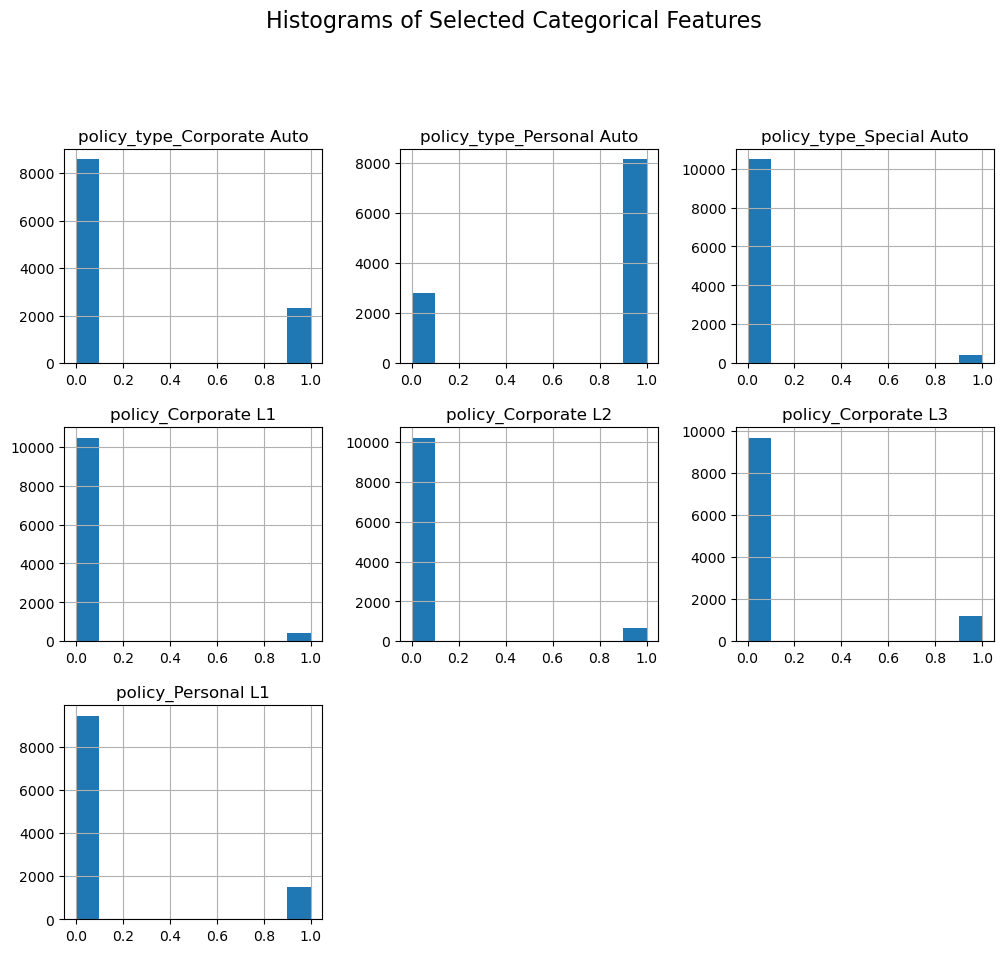

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Display histograms for specific numerical columns
selected_columns = [ 'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
      ]



#.hist() is a pandas method used to plot histograms for the selected columns.
#bins=10 specifies the number of bins (intervals) for each histogram.
#figsize=(12, 10) sets the size of the overall figure to be 12 units wide and 10 units high.
#layout=(3, 3) indicates that the histograms should be arranged in a 3x3 grid (3 rows, 3 columns).
#sharex=False ensures that each subplot has its own x-axis.
final_df[selected_columns].hist(bins=10, figsize=(12, 10), layout=(3, 3), sharex=False)

#plt.suptitle() is a Matplotlib function used to add a centered title to the entire figure.
#The title is set to 'Histograms of Selected Numerical Features'.
#y=1.02 adjusts the vertical position of the title, placing it slightly above the default position.
#fontsize=16 sets the font size of the title to 16 points.
plt.suptitle('Histograms of Selected Categorical Features', y=1.02, fontsize=16)

#Displays the histograms
plt.show()

In [18]:
#drop null values
#final_df = final_df.dropna()

In [19]:
#drop duplicates
#final_df = numericals_df.drop_duplicates()

In [20]:
final_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'education', 'vehicle_size', 'coverage', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'polic

In [21]:
#X-y split (y is the target variable, in this case, "total claim amount")
#X = final_df.drop[["total_claim_amount"]]
X = final_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'month', 'education', 'vehicle_size', 'coverage', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'renew_offer_type_Offer1',
       'renew_offer_type_Offer2', 'renew_offer_type_Offer3',
       'renew_offer_type_Offer4', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Four-Door Car',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'vehicle_type_A']]

y = final_df[["total_claim_amount"]]

In [22]:
y.isna().any()

total_claim_amount    False
dtype: bool

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [25]:
#retrieves the X-train DF; that trains the model
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,education,vehicle_size,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
4716,22217.967960,37553,187,34.0,7,0.0,2,2,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
8775,8260.639809,33321,105,6.0,2,0.0,3,1,0.0,1.0,...,1,0,0,0,0,0,1,0,0,1
4754,2269.841123,0,68,22.0,43,0.0,1,2,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
6569,8869.631143,0,119,12.0,57,0.0,4,1,0.0,1.0,...,0,0,0,0,0,0,1,0,0,1
1438,5002.093264,0,70,35.0,56,0.0,3,1,1.0,1.0,...,0,1,0,1,0,0,0,0,0,1


In [26]:
#Retrieves y_test DF; the test target
#Contains the actual target values.
y_test

,total_claim_amount
4829,475.423848
5081,350.400000
5011,482.400000
4625,673.342650
3838,302.400000
...,...
7450,460.266881
4715,405.883346
8581,41.182611
211,364.800000


array([[<Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

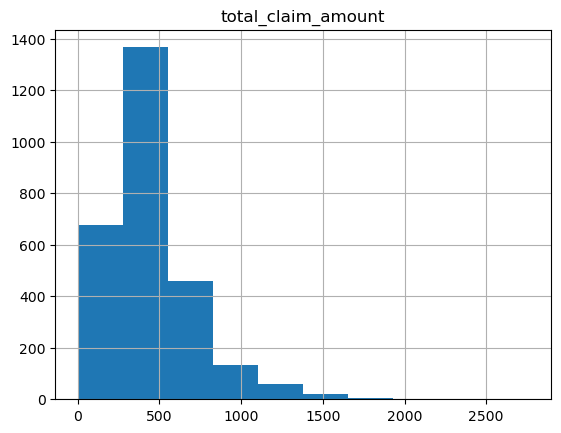

In [27]:
y_test.hist()

In [28]:
#Standardizes the data (after the data split!).
# This transforms each feature individually, scaling it based on the minimum and maximum values present in 
#that particular feature to get a range of values between [0,1]
scaler = MinMaxScaler()

#create the fit/frame
scaler = scaler.fit(X_train)


#transforms the data of X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.24954704, 0.37560136, 0.53164557, ..., 0.        , 0.        ,
        0.        ],
       [0.07813874, 0.33327332, 0.18565401, ..., 0.        , 0.        ,
        0.        ],
       [0.00456644, 0.        , 0.02953586, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07310297, 0.        , 0.03375527, ..., 0.        , 0.        ,
        0.        ],
       [0.03777879, 0.        , 0.03797468, ..., 0.        , 0.        ,
        0.        ],
       [0.44404234, 0.        , 0.2278481 , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
#tranforming the y_train because there is a large skew
#this may be negligible when the skew isn't noticeable
pt = PowerTransformer()

In [30]:
pt.fit(y_train)
y_train = pt.transform(y_train)


In [31]:
y_test = pt.transform(y_test)
y_test

array([[ 0.32183829],
       [-0.12034041],
       [ 0.34453305],
       ...,
       [-1.95903806],
       [-0.06545769],
       [-1.49017604]])

array([[<Axes: title={'center': '0'}>]], dtype=object)

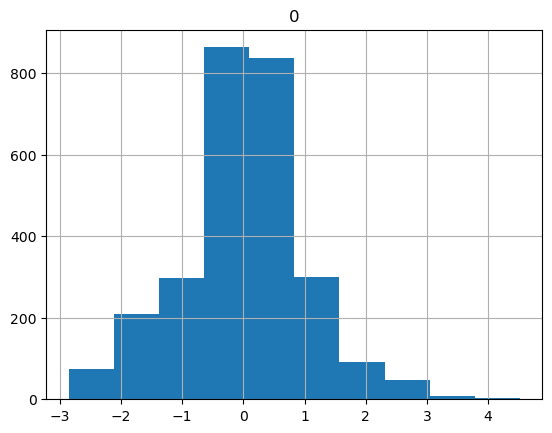

In [32]:
#This resets the index of the y_test pandas Series and drops the old index. 

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop = True)
y_test.hist()

In [33]:
y_train = pd.DataFrame(y_train)
X_train = pd.DataFrame(X_train)
train = pd.concat([X_train, y_train], axis = 1)
#train = train.dropna()

In [34]:
#Applying linear regression.
from sklearn.linear_model import LinearRegression

In [35]:
#Create and fit a linear regression model
#This calculates the line of best fit
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [36]:
#This displays the coefficient of all the X_train columns
model.coef_

array([[ 3.91366695e-02, -8.53530004e-02,  3.30257749e+00,
         2.78080526e-02, -1.35820017e-02, -2.82151214e-02,
         2.63328931e-02,  1.97180107e-03, -4.32383374e-02,
        -3.80797946e-02,  3.80473679e-02,  8.45460160e+11,
         8.45460160e+11,  8.45460160e+11,  8.45460160e+11,
         8.45460160e+11,  3.84490562e+11,  3.84490562e+11,
        -3.03413822e+10, -3.03413822e+10, -3.03413822e+10,
        -3.03413822e+10, -3.03413822e+10, -1.06849431e+08,
        -1.06849431e+08, -5.81735024e+11, -5.81735024e+11,
        -5.81735024e+11,  1.82397494e+11,  1.82397494e+11,
         1.82397494e+11, -2.96667066e+11, -4.62899496e+11,
        -1.56144344e+11, -2.96847656e+10, -2.96847656e+10,
        -2.96847656e+10,  1.36547665e+11,  1.36547665e+11,
         1.36547665e+11, -1.70207487e+11, -1.70207487e+11,
        -1.70207487e+11, -7.51120260e+10, -7.51120260e+10,
        -7.51120260e+10, -7.51120260e+10, -4.36853626e+11,
        -4.36853626e+11, -4.36853626e+11, -4.36853626e+1

In [37]:
model.intercept_

array([-1.69560127e+11])

## Predict total claim amount

In [38]:
random_claim = pd.DataFrame(X_test).sample()

In [39]:
random_claim

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
407,0.051662,0.848381,0.063291,0.142857,0.131313,0.0,0.5,0.0,0.25,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
model.predict(random_claim)

array([[-0.48013306]])

In [41]:
pt.inverse_transform(model.predict(random_claim))

C:\Users\flori\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[263.71311813]])

In [42]:
#Creating predictions for the test set
y_pred = model.predict(X_test)
y_pred

array([[-0.02706909],
       [ 0.11459351],
       [ 0.38864136],
       ...,
       [-1.66574097],
       [ 0.35354614],
       [-1.91891479]])

In [43]:
# inverse transforming predictions to show amount in $
pt.inverse_transform(y_pred)

C:\Users\flori\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[375.05927825],
       [414.2566757 ],
       [496.11619627],
       ...,
       [ 69.0336053 ],
       [485.18582505],
       [ 44.54454392]])

In [44]:
# inputing y_pred into a df
y_pred = pd.DataFrame(y_pred)

#Displays the DF containing the predicted target values.
y_pred

,0
0,-0.027069
1,0.114594
2,0.388641
3,0.626556
4,-0.157562
...,...
2723,0.476288
2724,0.050995
2725,-1.665741
2726,0.353546


In [45]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)

In [46]:
#is using the concat function from pandas to concatenate two Series (or DataFrames) along the columns (axis=1). 
#This operation is often done to create a DataFrame that contains both the actual target values  
#(y_test) and the predicted values (y_pred), making it easier to analyze and visualize the residuals.
residuals_market_df = pd.concat([y_test, y_pred], axis = 1)
residuals_market_df.columns = ["y_test","y_pred"]
residuals_market_df

,y_test,y_pred
0,0.321838,-0.027069
1,-0.120340,0.114594
2,0.344533,0.388641
3,0.907717,0.626556
4,-0.312689,-0.157562
...,...,...
2723,0.271899,0.476288
2724,0.084963,0.050995
2725,-1.959038,-1.665741
2726,-0.065458,0.353546


In [47]:
# This calculates the residuals and adds a new column named "residual" to the DataFrame
residuals_market_df["residual"] = residuals_market_df["y_test"] - residuals_market_df["y_pred"]


#Displays the residuals DF
residuals_market_df

,y_test,y_pred,residual
0,0.321838,-0.027069,0.348907
1,-0.120340,0.114594,-0.234934
2,0.344533,0.388641,-0.044108
3,0.907717,0.626556,0.281160
4,-0.312689,-0.157562,-0.155127
...,...,...,...
2723,0.271899,0.476288,-0.204388
2724,0.084963,0.050995,0.033968
2725,-1.959038,-1.665741,-0.293297
2726,-0.065458,0.353546,-0.419004


In [48]:
#Displays the first few rows of the DataFrame residuals_market_df after adding the "residual" colum
residuals_market_df.head()

,y_test,y_pred,residual
0,0.321838,-0.027069,0.348907
1,-0.120340,0.114594,-0.234934
2,0.344533,0.388641,-0.044108
3,0.907717,0.626556,0.281160
4,-0.312689,-0.157562,-0.155127


In [49]:
#Calculating metrics

#This method calculates the mean of the values in the "residual" column, providing a single value that represents 
#the average error across all observations. 
mean_error = residuals_market_df["residual"].mean()

#Displays the result which is assigned to the variable mean_error.
mean_error

0.006643090656945927

In [50]:
#imports two error metrics from scikit-learn with abbreviated names:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [51]:
#This uses the mean squared error (MSE) function from scikit-learn to calculate the mean squared difference between 
#the actual target values (y_test) and the predicted values (y_pred).
mse(y_test, y_pred)

0.171029148668605

In [52]:
#This uses the mean absolute error (MAE) function from scikit-learn to calculate 
#the mean absolute difference between the actual target values (y_test) and the predicted values (y_pred).
mae(y_test, y_pred)

0.31113200892570514

In [53]:
# This calculates the Root Mean Squared Error (RMSE) by using the mean_squared_error function 
#from scikit-learn and sets the squared parameter to False.
#The square root of the mse
#On average the model is going to have $139 off
rsme = mse(y_test,y_pred, squared = False)
rsme

0.41355670550555096

In [54]:
#A measure that explains how good the model is at explaining the target variable
#Explanatory power of the model
#The input variable explains 83% variability of the target variable
#R squared
#R2
from sklearn.metrics import r2_score

In [55]:
#The input variables explains 83% variability of the target variable
r2_test = round(r2_score(y_test,y_pred),2)
r2_test

0.83

In [56]:
y_train_pred = pd.DataFrame(model.predict(X_train))
y_train_pred

,0
0,1.803497
1,0.742828
2,0.389313
3,0.913910
4,0.454926
...,...
8177,0.979950
8178,0.616791
8179,0.156769
8180,0.378448


In [57]:
r2_train = round(r2_score(y_train, y_train_pred),2)
r2_train

0.83

In [58]:
#fi feature importance based on the variables and coefficient
#features can be gotten list(X_train.columns)
feature_names = list(X.columns)
feature_names

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'month',
 'education',
 'vehicle_size',
 'coverage',
 'state_Arizona',
 'state_California',
 'state_Nevada',
 'state_Oregon',
 'state_Washington',
 'response_No',
 'response_Yes',
 'employmentstatus_Disabled',
 'employmentstatus_Employed',
 'employmentstatus_Medical Leave',
 'employmentstatus_Retired',
 'employmentstatus_Unemployed',
 'gender_F',
 'gender_M',
 'location_code_Rural',
 'location_code_Suburban',
 'location_code_Urban',
 'marital_status_Divorced',
 'marital_status_Married',
 'marital_status_Single',
 'policy_type_Corporate Auto',
 'policy_type_Personal Auto',
 'policy_type_Special Auto',
 'policy_Corporate L1',
 'policy_Corporate L2',
 'policy_Corporate L3',
 'policy_Personal L1',
 'policy_Personal L2',
 'policy_Personal L3',
 'policy_Special L1',
 'policy_Special L2',
 'policy_Special L3',
 'ren

In [59]:
coefficients = model.coef_
coefficients

array([[ 3.91366695e-02, -8.53530004e-02,  3.30257749e+00,
         2.78080526e-02, -1.35820017e-02, -2.82151214e-02,
         2.63328931e-02,  1.97180107e-03, -4.32383374e-02,
        -3.80797946e-02,  3.80473679e-02,  8.45460160e+11,
         8.45460160e+11,  8.45460160e+11,  8.45460160e+11,
         8.45460160e+11,  3.84490562e+11,  3.84490562e+11,
        -3.03413822e+10, -3.03413822e+10, -3.03413822e+10,
        -3.03413822e+10, -3.03413822e+10, -1.06849431e+08,
        -1.06849431e+08, -5.81735024e+11, -5.81735024e+11,
        -5.81735024e+11,  1.82397494e+11,  1.82397494e+11,
         1.82397494e+11, -2.96667066e+11, -4.62899496e+11,
        -1.56144344e+11, -2.96847656e+10, -2.96847656e+10,
        -2.96847656e+10,  1.36547665e+11,  1.36547665e+11,
         1.36547665e+11, -1.70207487e+11, -1.70207487e+11,
        -1.70207487e+11, -7.51120260e+10, -7.51120260e+10,
        -7.51120260e+10, -7.51120260e+10, -4.36853626e+11,
        -4.36853626e+11, -4.36853626e+11, -4.36853626e+1

In [60]:
coefficients = [i for i in coefficients[0]]

In [61]:
fi_dict = {"names":feature_names, "coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,names,coeff
0,customer_lifetime_value,3.913667e-02
1,income,-8.535300e-02
2,monthly_premium_auto,3.302577e+00
3,months_since_last_claim,2.780805e-02
4,months_since_policy_inception,-1.358200e-02
5,number_of_open_complaints,-2.821512e-02
6,number_of_policies,2.633289e-02
7,month,1.971801e-03
8,education,-4.323834e-02
9,vehicle_size,-3.807979e-02


In [62]:
fi_df_sorted = fi_df.sort_values(by = "coeff", ascending = False)

<Axes: xlabel='coeff', ylabel='names'>

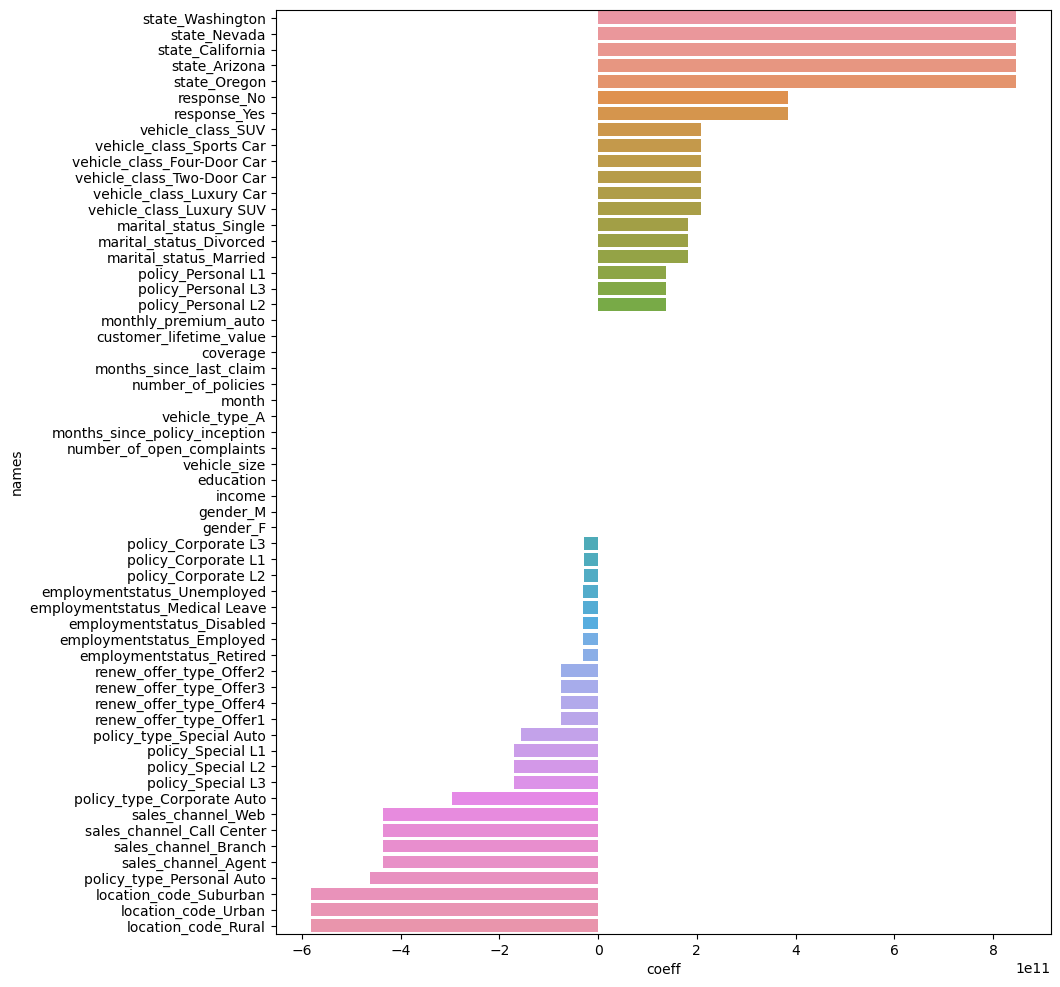

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
sns.barplot(y = fi_df_sorted["names"], x = fi_df_sorted["coeff"])

In [64]:
final_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,education,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,1.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,1.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,2.0,...,0,1,0,0,0,0,1,0,0,1
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,1.0,...,1,0,0,1,0,0,0,0,0,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,2.0,...,1,0,0,1,0,0,0,0,0,1


## LAB| Comparing Regression Models
## 1.Fit the models LinearRegression, Lasso and Ridge and compare the model performances.

## Linear Regression

In [97]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}") #R² score

LinearRegression: Train -> 0.8331767986569719, Test -> 0.8319960690814205


## Lasso Regression

In [66]:
model=Lasso(alpha=0) #no constraint added as lasso (lamda) is set to 0

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}") #computes the R

C:\Users\flori\anaconda4\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\flori\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Lasso: Train -> 0.8331783071219855, Test -> 0.8320043333948679


C:\Users\flori\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.825e+02, tolerance: 8.182e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [68]:
model=Lasso(alpha=0.1) #no constraint added as lasso (lamda) is set to 0

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}") #computes the R

Lasso: Train -> 0.515564585970265, Test -> 0.5249452772201484


In [87]:
model=Lasso(alpha=1.5) #no constraint added as lasso (lamda) is set to 0

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}") #computes the R

Lasso: Train -> 0.0, Test -> -1.3261496452088295e-06


## Ridge regression

In [73]:
model=Ridge(alpha=0)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.8151084058822189, Test -> 0.8139327122088713


In [74]:
model=Ridge(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.833177451503673, Test -> 0.8319869175253893


In [86]:
model=Ridge(alpha=1.5)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.8330247883984343, Test -> 0.8316331011050275


### Function

In [98]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

def train_and_test_models(models, X, y, test_size=0.25, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Train and test each model
    for model in models:
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        print(f"{model.__class__.__name__}: Train -> {train_score}, Test -> {test_score}")

# Example usage
models_to_try = [LinearRegression(), Lasso(alpha=1), Ridge(alpha=)]
train_and_test_models(models_to_try, X, y)

LinearRegression: Train -> 0.7702689480251463, Test -> 0.7689040259038303
Lasso: Train -> 0.7686405078181857, Test -> 0.7670122212736814
Ridge: Train -> 0.7702688550642479, Test -> 0.7689074178244271


### P-Value

In [109]:
from scipy import stats
#The probability of observing/collecting the sample average assuming the Ho is true is 0.0000003
#because it is lower than 5% or 0.05
p_value = stats.t.sf(4.76, df = 99)
print(p_value)

3.3066342302957467e-06


#### Recursive feature elimination

In [102]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 11, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 fe

,response_No,response_Yes,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,vehicle_class_Luxury Car
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8723,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8724,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8725,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8726,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
